# Model training

In [224]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Load the preprocessed dataset from a file

In [225]:
df = pd.read_csv('processed_dataset_v3.csv')
test_split_global = 0.5  # manually confirmed to yield the best accuracy for models
df.head(100)

,match_id,has_team_won,team_q_mmr_diff_sum,team_heroes_winrate_overall_mean,team_heroes_total_matches_played_sum,team_players_dire_winrate_all_time_mean,team_players_dire_games_played_all_time_mean,team_players_radiant_winrate_all_time_mean,team_players_radiant_games_played_all_time_mean,team_heroes_pick_confidence_score_allies_sum,...,team_players_net_sum,team_players_assists_number_sum,team_player_deaths_number_sum,team_players_kills_number_sum,team_hero_lvls_mean,team_players_kda_average_all_matches_mean,team_heroes_pickrate_average_mean,team_heroes_winrate_average_mean,team_heroes_pickrate_for_rank_mean,team_heroes_winrate_for_rank_mean
0,7393031014,True,1147,10.985433,993,-1.498229,1528.0,-0.830002,1409.4,-8,...,42138,84,-30,32,4.4,-0.475690,4.914816,1.816724,4.16994,1.62654
1,7393139706,True,1078,0.301894,191,-3.485422,812.8,-2.778400,754.6,4,...,25677,28,-7,6,1.0,-1.285879,2.560724,0.982756,1.31134,1.40456
2,7393178003,True,308,5.750341,131,2.017350,-1255.2,1.295491,-1291.0,0,...,25173,0,-3,2,0.4,0.506771,-3.103768,1.648532,-3.93056,1.33496
3,7393196807,False,-616,3.685672,862,-2.027335,2763.4,0.516487,2767.6,-2,...,-29915,-57,28,-30,-3.8,0.141931,-4.398308,2.334400,-3.72034,2.20772
4,7393211000,True,-2310,6.930735,-125,-1.872473,451.8,-3.235953,443.0,4,...,29481,47,-22,21,3.2,0.035616,3.331552,0.007632,3.41668,0.29068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,7396056914,False,-770,-4.302888,90,-1.694576,989.0,-0.466361,961.0,1,...,-37523,-85,37,-38,-4.2,-0.026572,-1.746372,-0.175764,-1.96964,-0.24070
96,7396073211,False,-4312,-15.691832,57,-5.121293,-189.0,-3.598325,-236.0,-3,...,-38748,-93,37,-37,-4.0,-0.299637,2.373432,-1.502356,1.10492,-1.88772
97,7396086506,True,924,-0.135184,548,-0.888792,1308.8,0.706847,1241.0,0,...,34991,33,-22,22,2.6,-0.119593,3.582832,0.083756,4.25742,0.51344
98,7396086610,False,-1848,0.287544,-485,1.003415,-1940.0,1.410999,-2038.4,2,...,-25759,-32,15,-15,-2.4,0.396458,1.334608,-2.539168,0.38906,-3.26688


In [226]:
df.describe()

,match_id,team_q_mmr_diff_sum,team_heroes_winrate_overall_mean,team_heroes_total_matches_played_sum,team_players_dire_winrate_all_time_mean,team_players_dire_games_played_all_time_mean,team_players_radiant_winrate_all_time_mean,team_players_radiant_games_played_all_time_mean,team_heroes_pick_confidence_score_allies_sum,team_heroes_pick_confidence_score_enemies_sum,...,team_players_net_sum,team_players_assists_number_sum,team_player_deaths_number_sum,team_players_kills_number_sum,team_hero_lvls_mean,team_players_kda_average_all_matches_mean,team_heroes_pickrate_average_mean,team_heroes_winrate_average_mean,team_heroes_pickrate_for_rank_mean,team_heroes_winrate_for_rank_mean
count,1.229600e+04,12296.000000,1.229600e+04,12296.00000,1.229600e+04,1.229600e+04,1.229600e+04,1.229600e+04,12296.000000,12296.000000,...,12296.000000,12296.000000,12296.000000,12296.00000,1.229600e+04,12296.000000,1.229600e+04,12296.000000,1.229600e+04,12296.000000
mean,7.519260e+09,0.000000,-3.467190e-18,0.00000,5.778649e-19,8.876006e-16,-2.311460e-18,-8.876006e-16,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,4.622920e-18,0.000000,-4.622920e-18,0.000000,-9.245839e-18,0.000000
std,7.484674e+07,1653.604154,9.089679e+00,710.26896,1.860782e+00,8.360972e+02,1.936199e+00,8.340358e+02,4.298065,3.023239,...,29740.789826,44.726897,19.849683,20.19551,3.041604e+00,0.408811,3.332724e+00,1.420015,3.693444e+00,1.663948
min,7.393031e+09,-7930.000000,-4.102612e+01,-6688.00000,-1.142173e+01,-4.215600e+03,-1.177328e+01,-4.236400e+03,-14.000000,-10.000000,...,-78694.000000,-146.000000,-60.000000,-60.00000,-7.600000e+00,-4.219236,-1.167806e+01,-5.302040,-1.330644e+01,-6.250360
25%,7.470030e+09,-1078.000000,-5.765606e+00,-272.00000,-1.090640e+00,-5.286000e+02,-1.180015e+00,-5.284000e+02,-3.000000,-2.000000,...,-28351.500000,-37.000000,-17.000000,-17.00000,-2.800000e+00,-0.257959,-2.289535e+00,-0.959774,-2.509760e+00,-1.105985
50%,7.506882e+09,0.000000,0.000000e+00,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
75%,7.586232e+09,1078.000000,5.765606e+00,272.00000,1.090640e+00,5.286000e+02,1.180015e+00,5.284000e+02,3.000000,2.000000,...,28351.500000,37.000000,17.000000,17.00000,2.800000e+00,0.257959,2.289535e+00,0.959774,2.509760e+00,1.105985
max,7.672827e+09,7930.000000,4.102612e+01,6688.00000,1.142173e+01,4.215600e+03,1.177328e+01,4.236400e+03,14.000000,10.000000,...,78694.000000,146.000000,60.000000,60.00000,7.600000e+00,4.219236,1.167806e+01,5.302040,1.330644e+01,6.250360


### Drop all the irrelevant columns (in-game data, ids, etc)

In [227]:
columns_to_drop = ['match_id', 'team_players_xpm_sum', 'team_players_gpm_sum', 'team_players_denies_sum', 'team_players_lasthits_sum', 'team_players_net_sum', 
                   'team_players_assists_number_sum', 'team_player_deaths_number_sum', 'team_players_kills_number_sum','team_hero_lvls_mean']

df = df.drop(columns=columns_to_drop)

df.columns

Index(['has_team_won', 'team_q_mmr_diff_sum',
       'team_heroes_winrate_overall_mean',
       'team_heroes_total_matches_played_sum',
       'team_players_dire_winrate_all_time_mean',
       'team_players_dire_games_played_all_time_mean',
       'team_players_radiant_winrate_all_time_mean',
       'team_players_radiant_games_played_all_time_mean',
       'team_heroes_pick_confidence_score_allies_sum',
       'team_heroes_pick_confidence_score_enemies_sum',
       'team_heroes_pick_confidence_score_total_sum',
       'team_players__time_played_all_matches_mean',
       'team_players_winrate_over_time_mean',
       'team_players_all_matches_played_number_mean',
       'team_players_matches_abandonment_rate_mean',
       'team_players_matches_lost_mean', 'team_players_matches_won_mean',
       'team_players_match_rank_initial_mmr_mean',
       'team_players_kda_average_all_matches_mean',
       'team_heroes_pickrate_average_mean', 'team_heroes_winrate_average_mean',
       'team_heroes_

In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12296 entries, 0 to 12295
Data columns (total 23 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   has_team_won                                     12296 non-null  bool   
 1   team_q_mmr_diff_sum                              12296 non-null  int64  
 2   team_heroes_winrate_overall_mean                 12296 non-null  float64
 3   team_heroes_total_matches_played_sum             12296 non-null  int64  
 4   team_players_dire_winrate_all_time_mean          12296 non-null  float64
 5   team_players_dire_games_played_all_time_mean     12296 non-null  float64
 6   team_players_radiant_winrate_all_time_mean       12296 non-null  float64
 7   team_players_radiant_games_played_all_time_mean  12296 non-null  float64
 8   team_heroes_pick_confidence_score_allies_sum     12296 non-null  int64  
 9   team_heroes_pick_confidence_

### Data visualisation

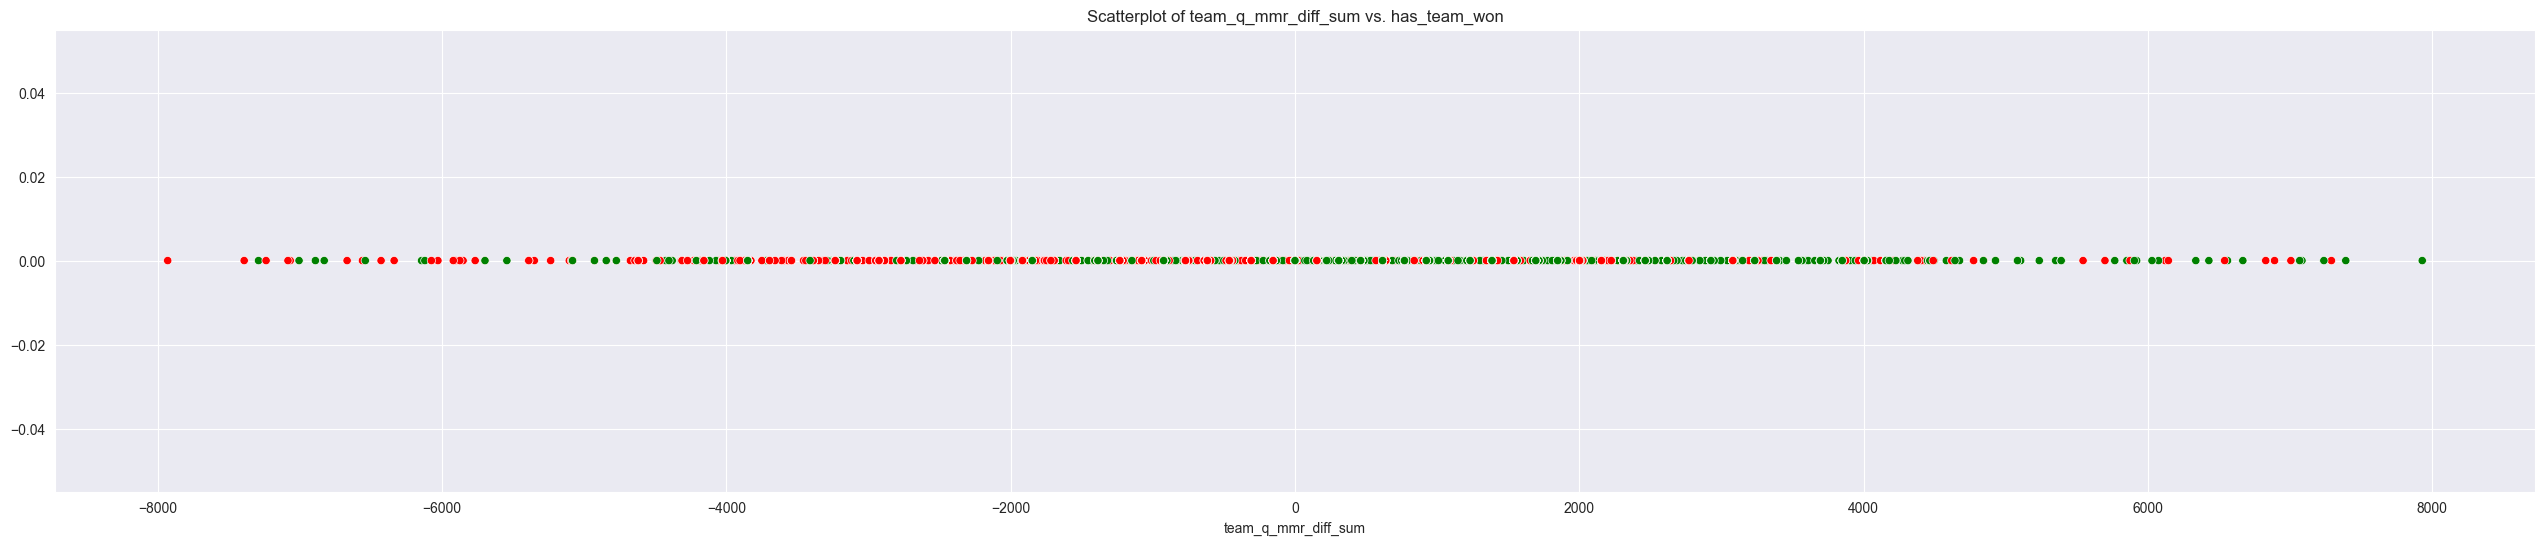

In [382]:
colors = {0: 'red', 1: 'green'}  # 0 for loss, 1 for win

df['dummy'] = 0

plt.figure(figsize=(32, 6))
sns.scatterplot(x='team_q_mmr_diff_sum', y='dummy', hue='has_team_won', palette=colors, data=df, legend=None)

plt.xlabel('team_q_mmr_diff_sum')
plt.ylabel('')
plt.title('Scatterplot of team_q_mmr_diff_sum vs. has_team_won')

plt.show()

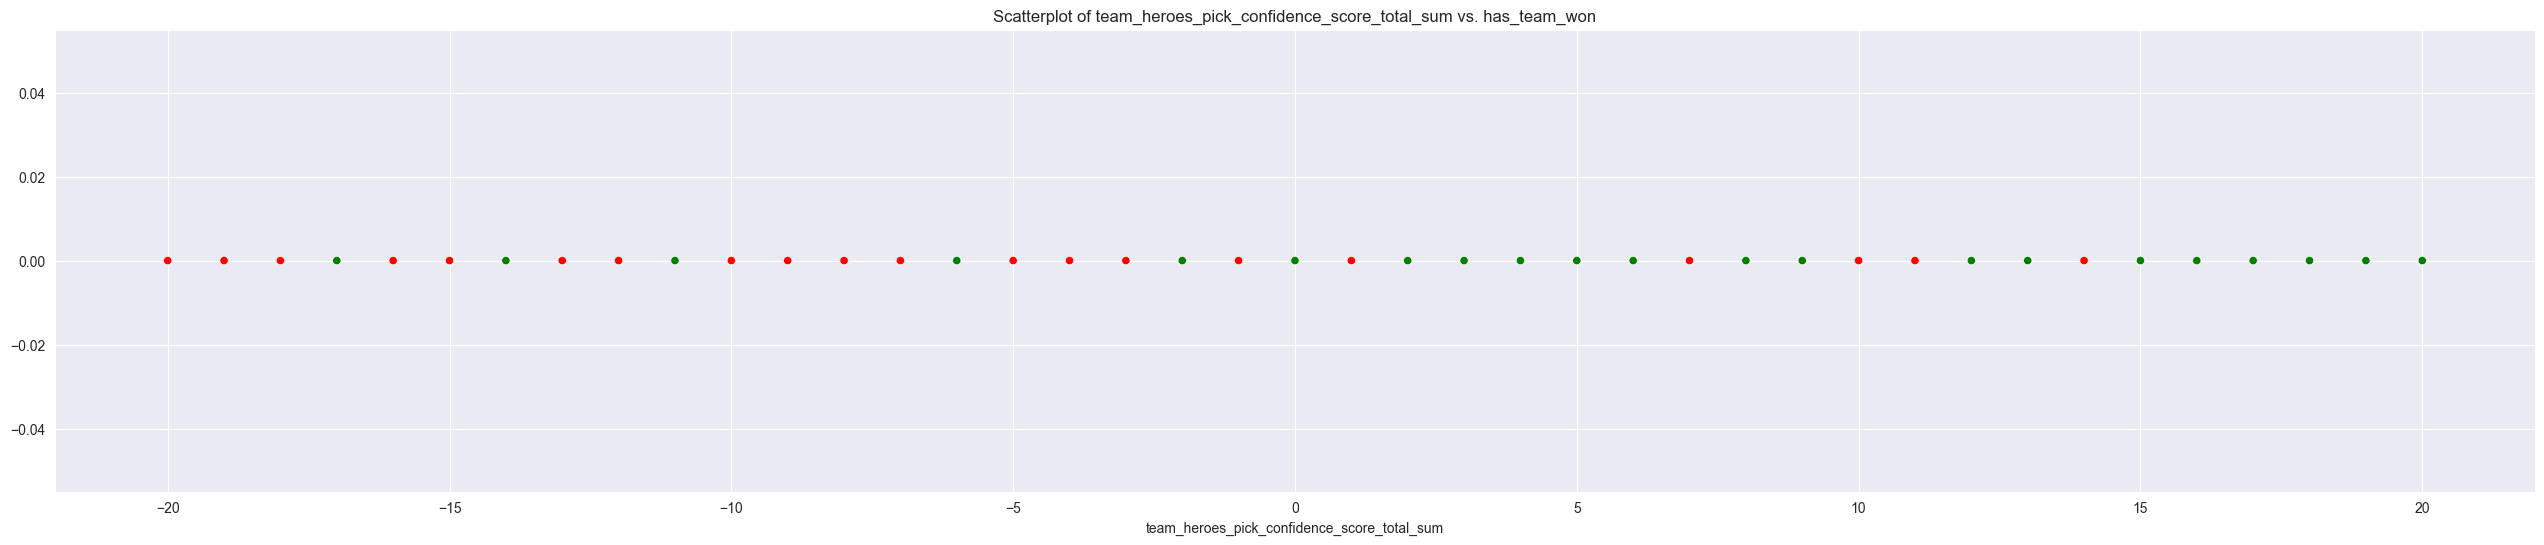

In [383]:
colors = {0: 'red', 1: 'green'}  # 0 for loss, 1 for win

feature = 'team_heroes_pick_confidence_score_total_sum'

df['dummy'] = 0

plt.figure(figsize=(32, 6))
sns.scatterplot(x=feature, y='dummy', hue='has_team_won', palette=colors, data=df, legend=None)

plt.xlabel(feature)
plt.ylabel('')
plt.title(f'Scatterplot of {feature} vs. has_team_won')

plt.show()

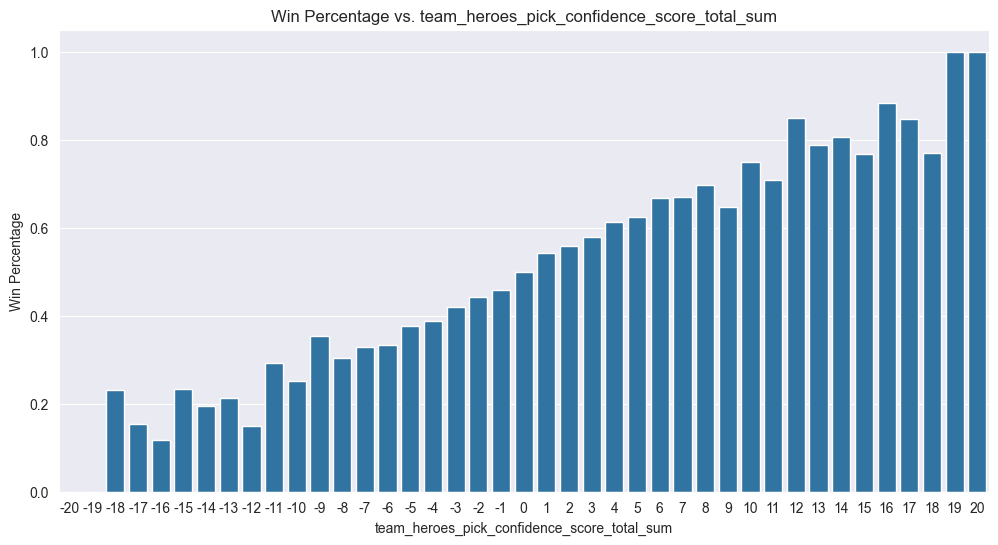

In [384]:
feature = 'team_heroes_pick_confidence_score_total_sum'

plt.figure(figsize=(12, 6))
sns.barplot(x=feature, y='has_team_won', data=df, errorbar=None)
plt.xlabel(f'{feature}')
plt.ylabel('Win Percentage')
plt.title(f'Win Percentage vs. {feature}')
plt.show()

We can observe a little problem with high abs(confidence_score) values. Since there should not be many of such matches, we will just get rid of those records.

In [232]:
df = df[abs(df['team_heroes_pick_confidence_score_total_sum']) < 21]

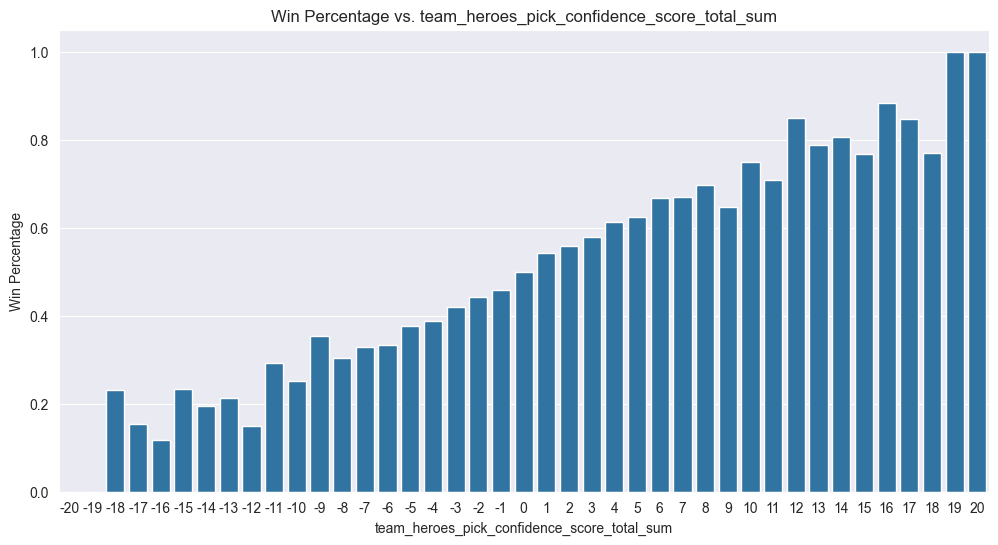

In [385]:
feature = 'team_heroes_pick_confidence_score_total_sum'

plt.figure(figsize=(12, 6))
sns.barplot(x=feature, y='has_team_won', data=df, errorbar=None)
plt.xlabel(f'{feature}')
plt.ylabel('Win Percentage')
plt.title(f'Win Percentage vs. {feature}')
plt.show()

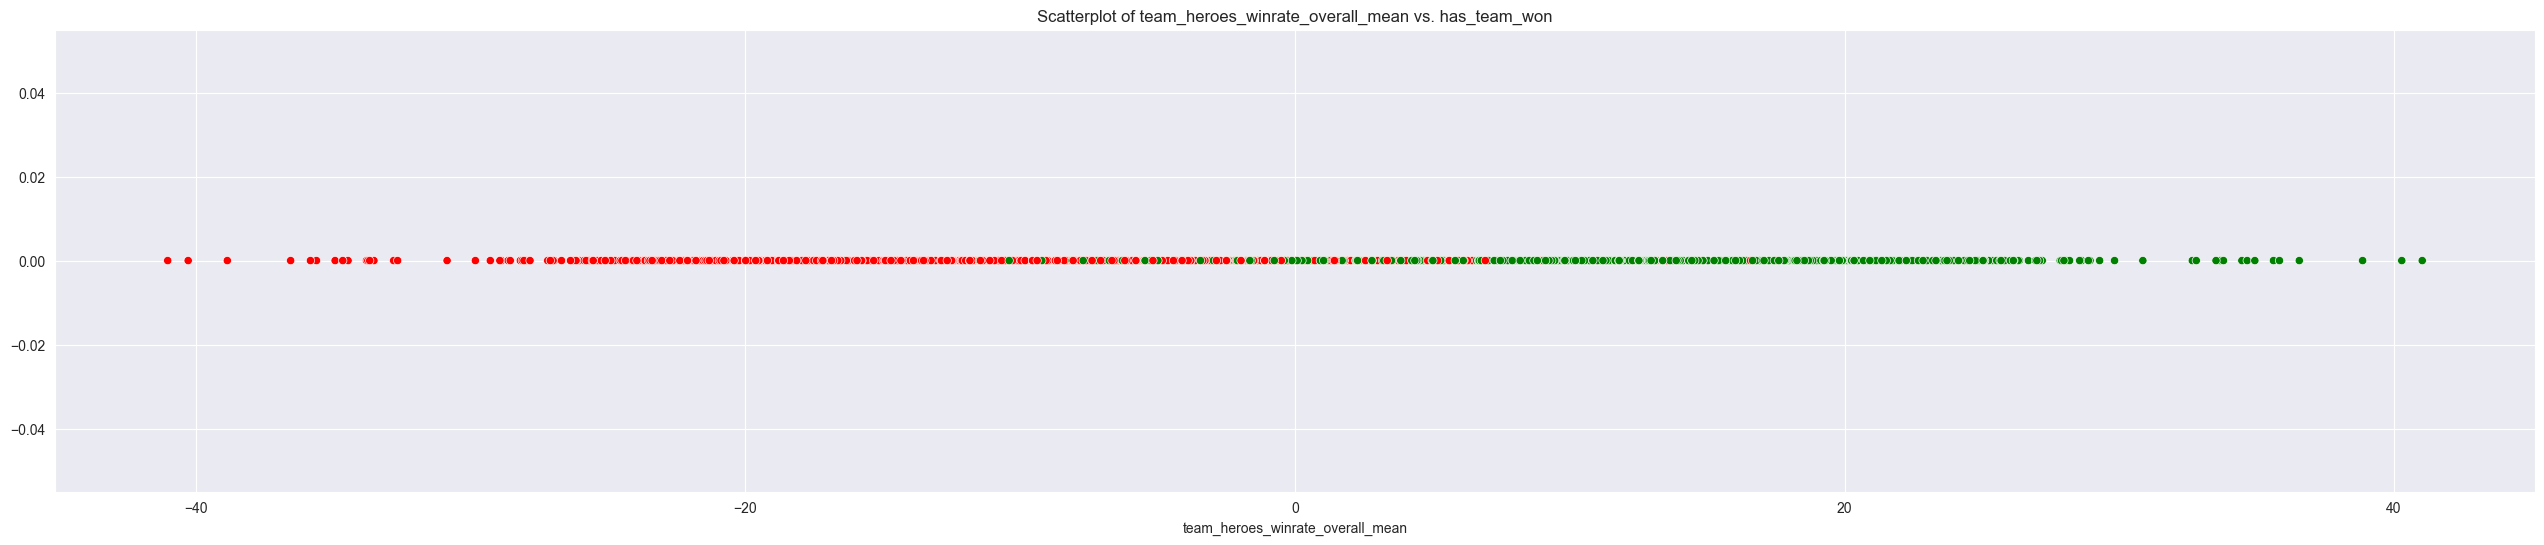

In [386]:
colors = {0: 'red', 1: 'green'}  # 0 for loss, 1 for win

feature = 'team_heroes_winrate_overall_mean'

df['dummy'] = 0

plt.figure(figsize=(32, 6))
sns.scatterplot(x=feature, y='dummy', hue='has_team_won', palette=colors, data=df, legend=None)

plt.xlabel(feature)
plt.ylabel('')
plt.title(f'Scatterplot of {feature} vs. has_team_won')

plt.show()

From the plots above we can clearly see that dataset obtained data-relations (and quite the promising ones as well) after all the processing and aggregations

### Prepare the data for training

In [235]:
import pandas as pd
from sklearn.model_selection import train_test_split

X = df.drop(columns=['has_team_won', 'dummy'])
y = df['has_team_won']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_split_global, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (6146, 22)
Shape of X_test: (6146, 22)
Shape of y_train: (6146,)
Shape of y_test: (6146,)


In [236]:
X.head(10)

,team_q_mmr_diff_sum,team_heroes_winrate_overall_mean,team_heroes_total_matches_played_sum,team_players_dire_winrate_all_time_mean,team_players_dire_games_played_all_time_mean,team_players_radiant_winrate_all_time_mean,team_players_radiant_games_played_all_time_mean,team_heroes_pick_confidence_score_allies_sum,team_heroes_pick_confidence_score_enemies_sum,team_heroes_pick_confidence_score_total_sum,...,team_players_all_matches_played_number_mean,team_players_matches_abandonment_rate_mean,team_players_matches_lost_mean,team_players_matches_won_mean,team_players_match_rank_initial_mmr_mean,team_players_kda_average_all_matches_mean,team_heroes_pickrate_average_mean,team_heroes_winrate_average_mean,team_heroes_pickrate_for_rank_mean,team_heroes_winrate_for_rank_mean
0,1147,10.985433,993,-1.498229,1528.0,-0.830002,1409.4,-8,-3,-11,...,596.6,4.392295,305.8,290.8,229.4,-0.475690,4.914816,1.816724,4.16994,1.62654
1,1078,0.301894,191,-3.485422,812.8,-2.778400,754.6,4,1,5,...,1411.4,-0.571170,758.0,653.4,215.6,-1.285879,2.560724,0.982756,1.31134,1.40456
2,308,5.750341,131,2.017350,-1255.2,1.295491,-1291.0,0,10,10,...,-675.4,-2.515355,-341.0,-334.4,61.6,0.506771,-3.103768,1.648532,-3.93056,1.33496
3,-616,3.685672,862,-2.027335,2763.4,0.516487,2767.6,-2,6,4,...,4152.4,0.098363,2054.0,2098.4,-123.2,0.141931,-4.398308,2.334400,-3.72034,2.20772
4,-2310,6.930735,-125,-1.872473,451.8,-3.235953,443.0,4,-1,3,...,229.2,1.451957,155.4,73.8,-462.0,0.035616,3.331552,0.007632,3.41668,0.29068
5,-1848,-17.122664,-550,0.230736,-266.6,-0.760767,-259.2,5,-3,2,...,-504.2,-0.942566,-220.2,-284.0,-369.6,0.498322,3.060500,-0.826844,3.36810,-0.97776
6,-616,-0.273552,-331,1.884795,-1913.0,1.260623,-1897.8,-5,1,-4,...,-2234.6,1.902371,-1142.0,-1092.6,-123.2,0.159909,-7.553596,0.868612,-7.97700,1.07106
7,-308,7.079083,-208,-3.618822,1106.6,-1.431606,1108.0,-1,0,-1,...,1134.2,0.956069,599.2,535.0,-61.6,-0.960422,-4.417176,1.012380,-4.27788,1.09684
8,-2310,13.319439,34,0.190801,243.2,-1.949353,191.6,1,2,3,...,424.8,0.250546,222.4,202.4,-462.0,-0.183712,-3.779732,1.309988,-1.95162,2.00738
9,-308,-5.800618,-766,0.757684,169.0,1.174380,174.0,-3,-3,-6,...,1105.2,0.070867,531.8,573.4,-61.6,0.024588,-5.185940,-0.234672,-4.82374,-0.20616


### Examine dataset baseline

In [237]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

majority_outcome = y_train.value_counts().idxmax()

baseline_model = DummyClassifier(strategy='most_frequent')

baseline_model.fit(X_train, y_train)

baseline_predictions = baseline_model.predict(X_test)

baseline_accuracy = accuracy_score(y_test, baseline_predictions)
print('Baseline Accuracy:', baseline_accuracy)

Baseline Accuracy: 0.49349170191994796


Baseline accuracy is around 50% which suggest a reasonably balanced dataset.

### Train the RandomForest model

In [238]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=110, random_state=42, min_samples_split=110)

rf_model.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=110, n_estimators=110, random_state=42)

### Test the RandomForest model

In [239]:
y_pred = rf_model.predict(X_test)

y_train_pred = rf_model.predict(X_train)

train_accuracy = accuracy_score(y_train, y_train_pred)
print('Training Accuracy:', train_accuracy)

print('Training Classification Report:')
print(classification_report(y_train, y_train_pred))

accuracy = accuracy_score(y_test, y_pred)
print('\nTest Accuracy:', accuracy)

print('Test Classification Report:')
print(classification_report(y_test, y_pred))

Training Accuracy: 0.8184184835665473
Training Classification Report:
              precision    recall  f1-score   support

       False       0.82      0.82      0.82      3113
        True       0.82      0.81      0.82      3033

    accuracy                           0.82      6146
   macro avg       0.82      0.82      0.82      6146
weighted avg       0.82      0.82      0.82      6146


Test Accuracy: 0.7860397006182883
Test Classification Report:
              precision    recall  f1-score   support

       False       0.79      0.78      0.78      3033
        True       0.79      0.79      0.79      3113

    accuracy                           0.79      6146
   macro avg       0.79      0.79      0.79      6146
weighted avg       0.79      0.79      0.79      6146


As was to be expected: good results from a powerful model

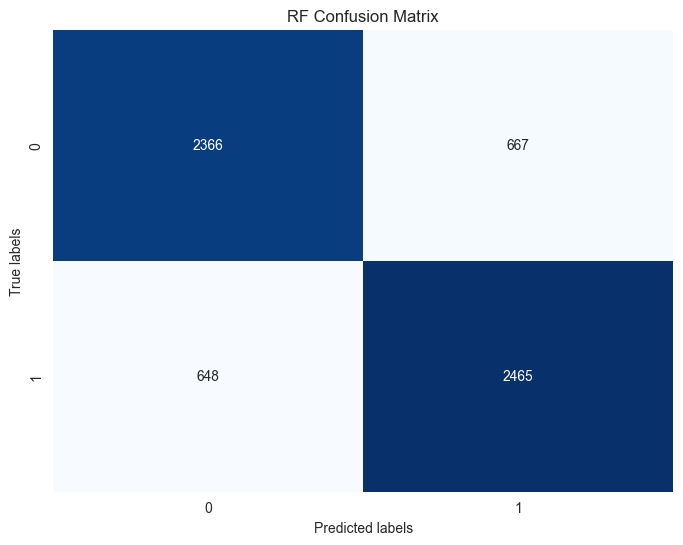

In [240]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('RF Confusion Matrix')
plt.show()

### Inspect the most important RF features

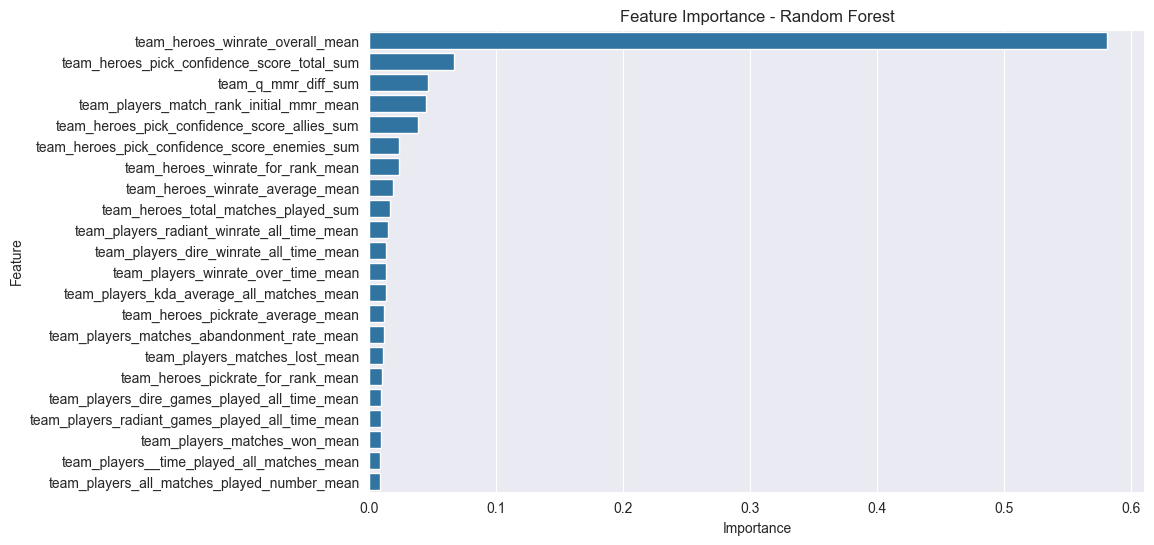

In [379]:
feature_importances = rf_model.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance - Random Forest')
plt.show()

### Train the LogisticRegression model

Note: we use data standardization to improve algorithm's convergence

In [321]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

pipe = make_pipeline(StandardScaler(), PolynomialFeatures(degree=2), LogisticRegression(max_iter=10000))

In [322]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'logisticregression__C': [0.01, 0.05, 0.1],
    'logisticregression__penalty': ['l2'],
    'logisticregression__solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
}

grid_search = GridSearchCV(pipe, param_grid, cv=100, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print('Best Hyperparameters:', best_params)

best_pipe = grid_search.best_estimator_
test_accuracy = best_pipe.score(X_test, y_test)
print('Test Accuracy:', test_accuracy)

Best Hyperparameters: {'logisticregression__C': 0.01, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'sag'}
Test Accuracy: 0.7865278229742922


### Test the LogisticRegression model

In [325]:
best_pipe.fit(X_train, y_train)

y_train_pred = best_pipe.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print('Training Accuracy:', train_accuracy)

print('Training Classification Report:')
print(classification_report(y_train, y_train_pred))

y_test_pred = best_pipe.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print('\nTest Accuracy:', test_accuracy)

print('Test Classification Report:')
print(classification_report(y_test, y_test_pred))

Training Accuracy: 0.7875040676863
Training Classification Report:
              precision    recall  f1-score   support

       False       0.79      0.80      0.79      3113
        True       0.79      0.78      0.78      3033

    accuracy                           0.79      6146
   macro avg       0.79      0.79      0.79      6146
weighted avg       0.79      0.79      0.79      6146


Test Accuracy: 0.7868532378782949
Test Classification Report:
              precision    recall  f1-score   support

       False       0.78      0.79      0.78      3033
        True       0.79      0.79      0.79      3113

    accuracy                           0.79      6146
   macro avg       0.79      0.79      0.79      6146
weighted avg       0.79      0.79      0.79      6146


Model shows good results both for train and test data

### Models' performance graphs

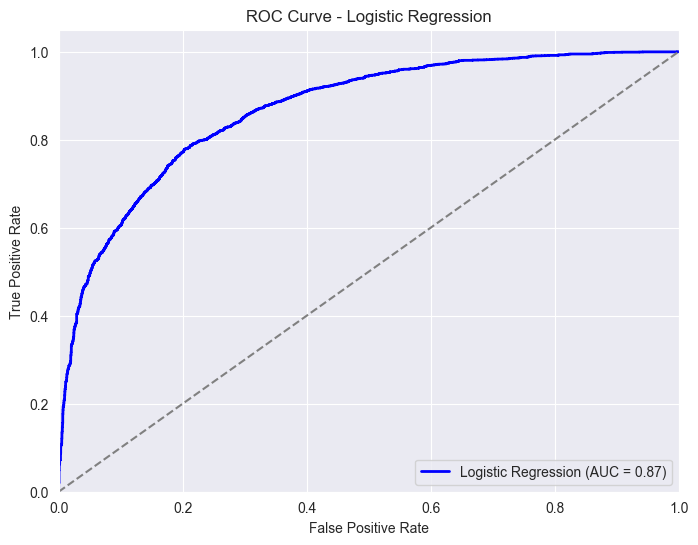

In [346]:
from sklearn.metrics import roc_curve, auc

y_pred_proba_lr = best_pipe.predict_proba(X_test)[:,1]
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_proba_lr)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='b', lw=2, label='Logistic Regression (AUC = %0.2f)' % auc(fpr_lr, tpr_lr))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.show()

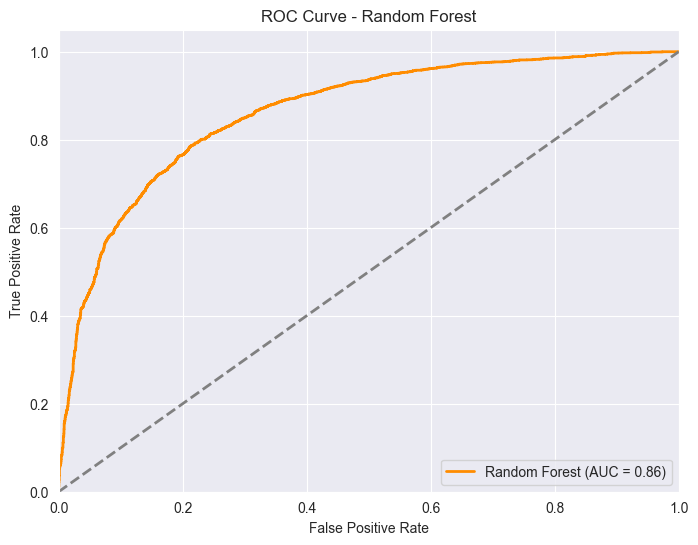

In [347]:
from sklearn.metrics import roc_curve, auc

y_score = rf_model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='Random Forest (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc="lower right")
plt.show()

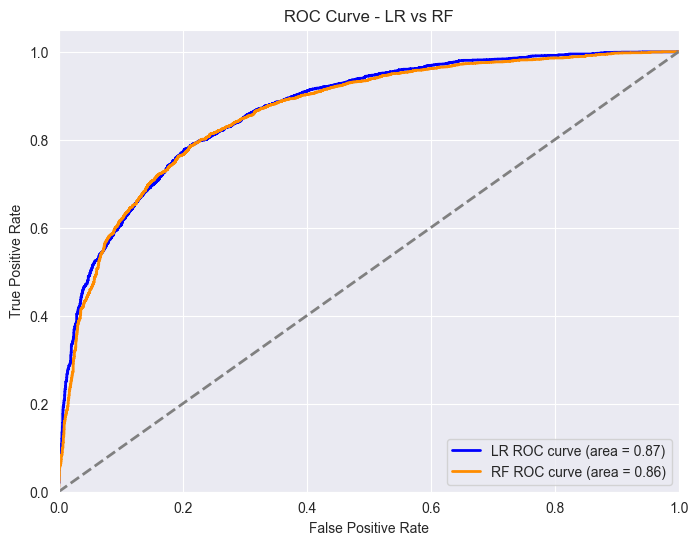

In [348]:
lr_y_score = best_pipe.predict_proba(X_test)[:,1]
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_y_score)
lr_roc_auc = auc(lr_fpr, lr_tpr)

rf_y_score = rf_model.predict_proba(X_test)[:,1]
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_y_score)
rf_roc_auc = auc(rf_fpr, rf_tpr)

plt.figure(figsize=(8, 6))
lw = 2
plt.plot(lr_fpr, lr_tpr, color='blue',
         lw=lw, label='LR ROC curve (area = %0.2f)' % lr_roc_auc)
plt.plot(rf_fpr, rf_tpr, color='darkorange',
         lw=lw, label='RF ROC curve (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - LR vs RF')
plt.legend(loc="lower right")
plt.show()

### Inspect the most important LR features

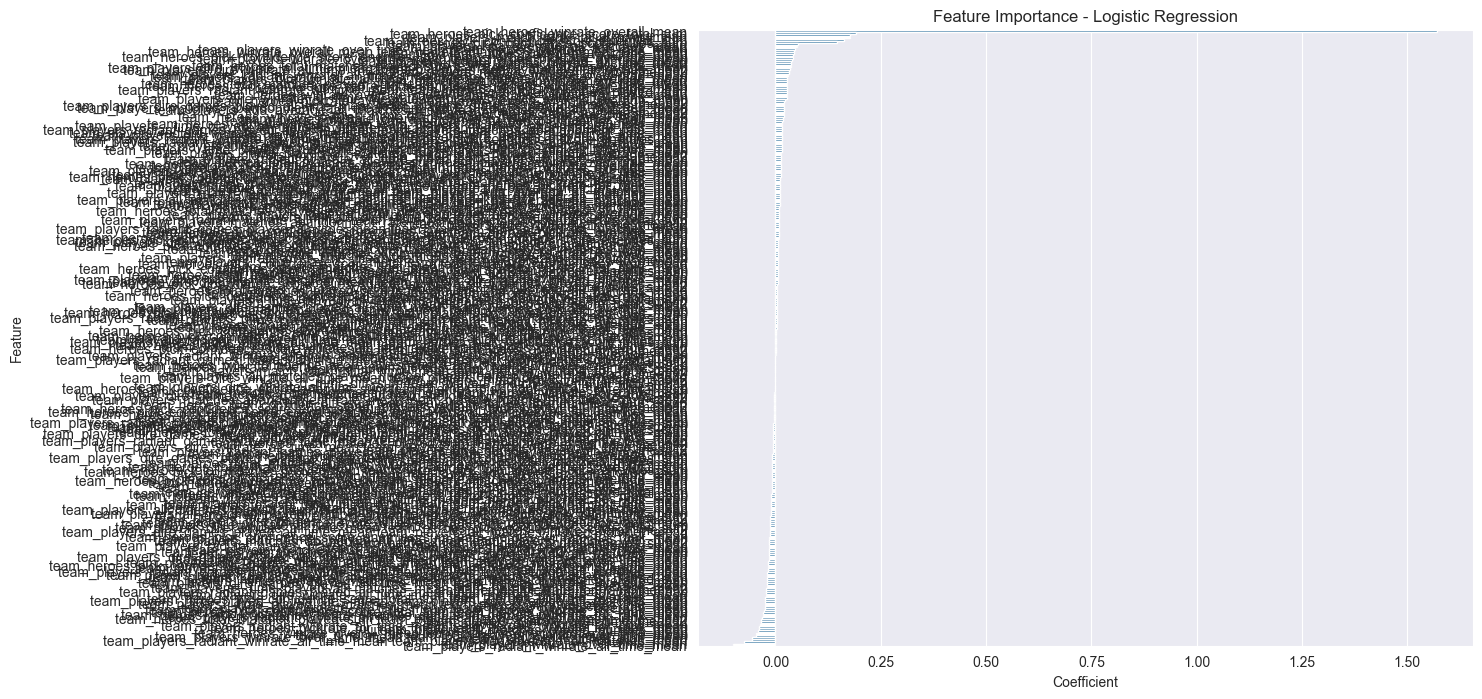

In [354]:
lr_coeffs = best_pipe.named_steps['logisticregression'].coef_[0]

poly = best_pipe.named_steps['polynomialfeatures']
poly_features = poly.get_feature_names_out(input_features=X_train.columns)

feature_importance_lr = pd.DataFrame({'Feature': poly_features, 'Coefficient': lr_coeffs})
feature_importance_lr = feature_importance_lr.sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance_lr)
plt.title('Feature Importance - Logistic Regression')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()

Since polynomial features are not very... representative, we will also display a version without merges:

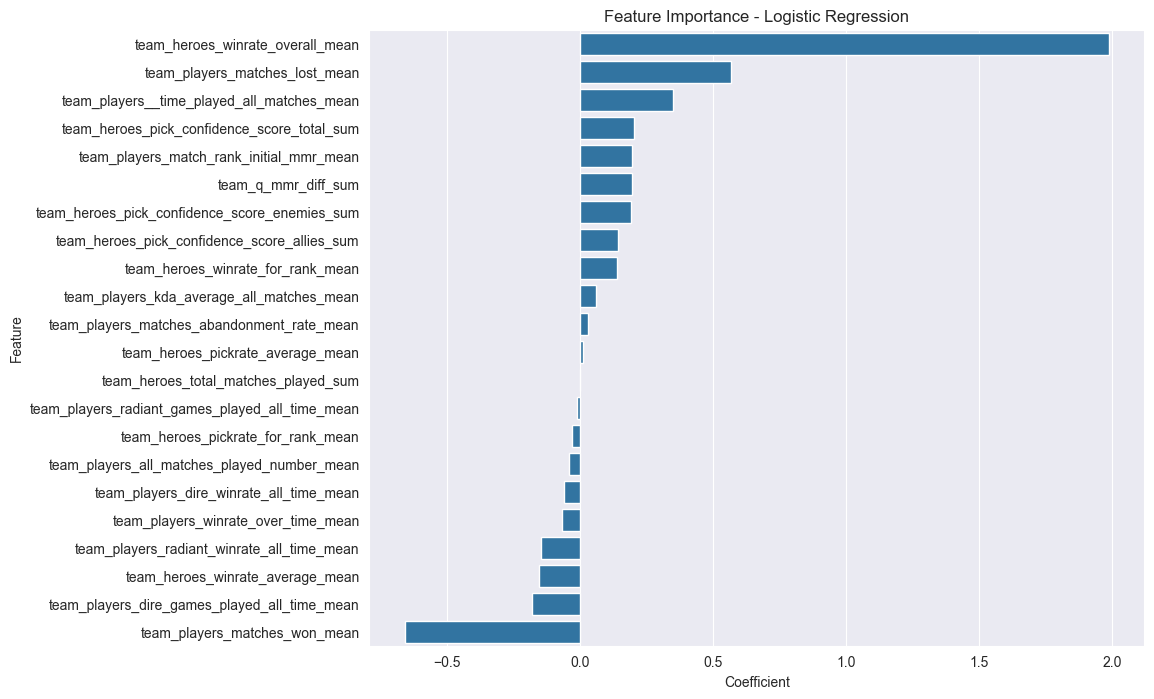

In [381]:
pipe = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))
pipe.fit(X_train, y_train)

lr_coeffs = pipe.named_steps['logisticregression'].coef_[0]

feature_importance_lr = pd.DataFrame({'Feature': X.columns, 'Coefficient': lr_coeffs})

feature_importance_lr = feature_importance_lr.sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance_lr)
plt.title('Feature Importance - Logistic Regression')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()

That is way better, though not exactly accurate, since we never use the model without PolyFeatures, but that will have to do for the basic visuals

### Use KBest features to improve the LR model

In [373]:
from sklearn.feature_selection import SelectKBest, VarianceThreshold

var_threshold = 0.01
selector = VarianceThreshold(threshold=var_threshold)
X_train_selected = selector.fit_transform(X_train)
X_test_selected = selector.transform(X_test)

new_pipe = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(degree=2),
    selector,
    SelectKBest(k=13),
    LogisticRegression(max_iter=10000)
)

new_pipe.fit(X_train_selected, y_train)

y_pred = new_pipe.predict(X_test_selected)
score = new_pipe.score(X_test_selected, y_test)

print(f'Accuracy: {score}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.7905955092743248
Classification Report:
              precision    recall  f1-score   support

       False       0.79      0.79      0.79      3033
        True       0.79      0.79      0.79      3113

    accuracy                           0.79      6146
   macro avg       0.79      0.79      0.79      6146
weighted avg       0.79      0.79      0.79      6146


In [374]:
new_pipe.fit(X_train, y_train)

y_train_pred = new_pipe.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print('\nTraining Accuracy:', train_accuracy)

print('Training Classification Report:')
print(classification_report(y_train, y_train_pred))

y_test_pred = new_pipe.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print('\nTest Accuracy:', test_accuracy)

print('Test Classification Report:')
print(classification_report(y_test, y_test_pred))


Training Accuracy: 0.7876667751383013
Training Classification Report:
              precision    recall  f1-score   support

       False       0.79      0.79      0.79      3113
        True       0.79      0.78      0.78      3033

    accuracy                           0.79      6146
   macro avg       0.79      0.79      0.79      6146
weighted avg       0.79      0.79      0.79      6146


Test Accuracy: 0.7905955092743248
Test Classification Report:
              precision    recall  f1-score   support

       False       0.79      0.79      0.79      3033
        True       0.79      0.79      0.79      3113

    accuracy                           0.79      6146
   macro avg       0.79      0.79      0.79      6146
weighted avg       0.79      0.79      0.79      6146


Fine results, except the fact that test accuracy is slightly higher than train. I assume that this depends on the dataset-subset taken, so cross validation should resolve the issue:

In [378]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report

cv_scores = cross_val_score(new_pipe, X_train, y_train, cv=50)

print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score Test:", sum(cv_scores) / len(cv_scores))

y_train_pred = new_pipe.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print('\nTraining Accuracy:', train_accuracy)
print('Training Classification Report:')
print(classification_report(y_train, y_train_pred))

y_test_pred = new_pipe.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print('\nTest Accuracy:', test_accuracy)
print('Test Classification Report:')
print(classification_report(y_test, y_test_pred))

Cross-Validation Scores: [0.77235772 0.80487805 0.74796748 0.76422764 0.71544715 0.81300813
 0.75609756 0.75609756 0.72357724 0.85365854 0.83739837 0.80487805
 0.79674797 0.74796748 0.76422764 0.82113821 0.75609756 0.85365854
 0.76422764 0.7398374  0.79674797 0.82113821 0.7398374  0.78861789
 0.77235772 0.70731707 0.76422764 0.7398374  0.80487805 0.78861789
 0.75609756 0.80487805 0.81300813 0.76422764 0.77235772 0.82113821
 0.75609756 0.84552846 0.80487805 0.79674797 0.83739837 0.85365854
 0.75609756 0.81300813 0.78861789 0.71544715 0.78688525 0.81967213
 0.77868852 0.83606557]
Mean Cross-Validation Score Test: 0.7847514327602292

Training Accuracy: 0.7876667751383013
Training Classification Report:
              precision    recall  f1-score   support

       False       0.79      0.79      0.79      3113
        True       0.79      0.78      0.78      3033

    accuracy                           0.79      6146
   macro avg       0.79      0.79      0.79      6146
weighted avg       

As we can see from Cross-Validation Scores - depending on the subset we might get results that differ a lot, which is expected given the nature of the dataset plus binary classification. I believe the issue may be deemed as handled.

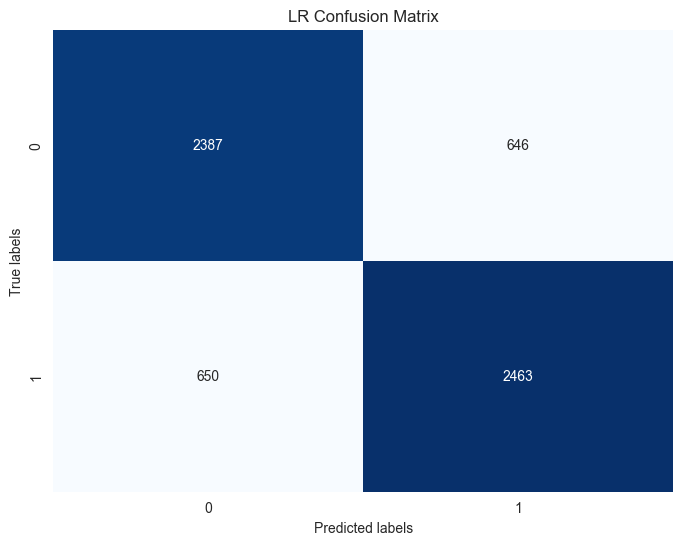

In [357]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('LR Confusion Matrix')
plt.show()

In [358]:
from joblib import dump

dump(rf_model, 'random_forest_model.joblib')
dump(pipe, 'logistic_regression_model.joblib')

['logistic_regression_model.joblib']

## Conclusion

In scope of this notebook we trained two models: RandomForest and Logistic Regression. Both models achieved good results showcasing the accuracy scores of 77+%.
We also tried calibrating the LR model via feature-selection, achieving 0.25% additional accuracy.

From my personal experience as a Dota 2 player I could say the results are more than satisfying.